In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import keras
import pandas as pd

In [73]:
from __future__ import absolute_import
from __future__ import print_function
import os
import time

from datetime import timedelta
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0) # Set default figure size

In [74]:
TENSORBOARD_SUMMARIES_DIR = '/tmp/svhn_classifier_logs'

# Loading Data

In [75]:

# Open the file as readonly
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


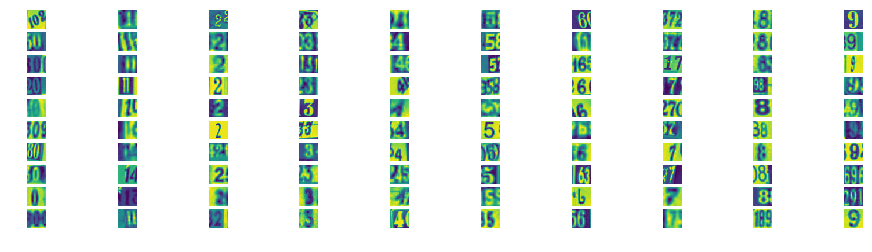

In [76]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.

classes=["one","two","three","four","five","six","seven","eight","nine","zero"]
num_classes=10
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        
plt.show()

In [77]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k

#data=Dataset()
kVals = range(1, 30, 3)
accuracies = []
trainData=np.array(X_train)
trainLabels=np.array(y_train)
valData=np.array(X_val)
valLabels=np.array(y_val)
testData=np.array(X_test)
testLabels=np.array(y_test)


#X = X.reshape(X.shape[0], -1)

trainData = X_train.reshape(len(X_train),-1)
valData=X_val.reshape(len(X_val),-1)
testData=X_test.reshape(len(X_test),-1)

#valdation data set is very big, hence i am taking 10% from trainig data
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,test_size=0.1, random_state=84)


print (trainData.shape)
print (trainLabels.shape)

print (valData.shape)
print (valLabels.shape)



(37800, 1024)
(37800,)
(4200, 1024)
(4200,)


In [19]:
# loop over various values of `k` for the k-Nearest Neighbor classifier

print ('start')
for k in range(1, 30, 2):
    print(k)
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
    print('fitting in-progress')
    # evaluate the model and update the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
          
# find the value of k that has the largest accuracy



start
1
fitting in-progress
k=1, accuracy=45.24%
3
fitting in-progress
k=3, accuracy=45.14%
5
fitting in-progress
k=5, accuracy=47.31%
7
fitting in-progress
k=7, accuracy=48.95%
9
fitting in-progress
k=9, accuracy=49.62%
11
fitting in-progress
k=11, accuracy=50.14%
13
fitting in-progress
k=13, accuracy=50.45%
15
fitting in-progress
k=15, accuracy=50.86%
17
fitting in-progress
k=17, accuracy=51.43%
19
fitting in-progress
k=19, accuracy=51.50%
21
fitting in-progress
k=21, accuracy=51.60%
23
fitting in-progress
k=23, accuracy=51.90%
25
fitting in-progress
k=25, accuracy=51.95%
27
fitting in-progress
k=27, accuracy=52.14%
29
fitting in-progress
k=29, accuracy=52.24%


IndexError: range object index out of range

In [ ]:
kVals = range(1, 30, 2)
i = np.argmax(accuracies)


print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

# re-train our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
#print(predictions[1])

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

# Print Classification Report

In [30]:


print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

print ("Confusion matrix")
print(confusion_matrix(testLabels,predictions))

# loop over a few random digits



EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.45      0.70      0.54      1814
           1       0.45      0.73      0.56      1828
           2       0.62      0.53      0.57      1803
           3       0.46      0.43      0.45      1719
           4       0.64      0.65      0.64      1812
           5       0.53      0.40      0.46      1768
           6       0.51      0.41      0.45      1832
           7       0.70      0.62      0.66      1808
           8       0.45      0.36      0.40      1812
           9       0.56      0.44      0.49      1804

   micro avg       0.53      0.53      0.53     18000
   macro avg       0.54      0.53      0.52     18000
weighted avg       0.54      0.53      0.52     18000

Confusion matrix
[[1265   64   36   44   47   34  103   34   85  102]
 [  94 1331   61   82   82   30   39   50   26   33]
 [  98  243  960  102   49   41   33  151   48   78]
 [ 101  279  116  743   54  158   45  

i think tha digit is : 9


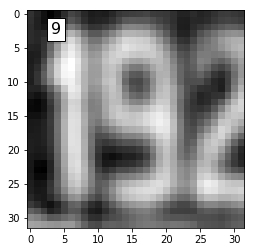

i think tha digit is : 2


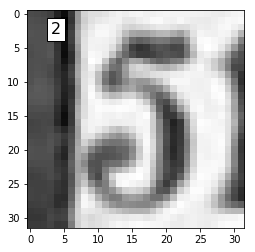

i think tha digit is : 1


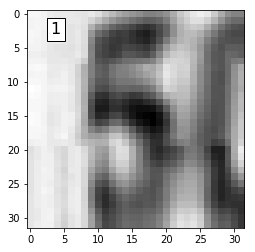

i think tha digit is : 1


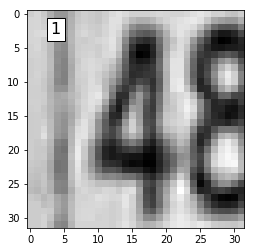

i think tha digit is : 1


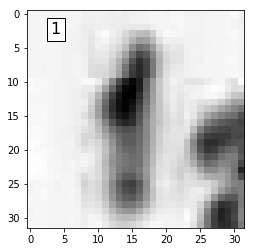

In [31]:
for i in np.random.randint(0, high=len(testLabels), size=(5,)):
         # grab the image and classify it
         image = testData[i]
         prediction = model.predict([image])[0]
         # convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
         # then resize it to 32 x 32 pixels so we can see it better
##         image = image.reshape((64, 64))
##         image = exposure.rescale_intensity(image, out_range=(0, 255))
##         image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
         
         # show the prediction
         
         imgdata = np.array(image, dtype='float')
         pixels = imgdata.reshape((32,32))
         plt.imshow(pixels,cmap='gray')
         plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
         print("i think tha digit is : {}".format(prediction))
         #cv2.imshow("image", image)
         plt.show()
         #cv2.waitKey(0)

#  Feed forward CNN with Keras

In [146]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import BatchNormalization,Input
from keras.layers import Conv2D, MaxPooling2D, Flatten



In [39]:
def make_model(optimizer='adam', hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_dim = 1024),
        Activation('relu'),
        Dense(hidden_size),
        Activation('relu'),
        Dense(10),
        Activation('softmax')
    ])
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

    return model


In [40]:
clf = KerasClassifier(make_model)
param_grid = {'epochs' : [1, 3, 5],
              'hidden_size':  [10, 32, 64]}

grid = GridSearchCV(clf, param_grid = param_grid, cv = 5)
#grid.fit(X_train, y_train)
grid.fit(trainData, trainLabels)
print(grid.best_params_)

Epoch 1/1
30240/30240 [==============================] - 1s 23us/step
Epoch 1/1
30240/30240 [==============================] - 1s 17us/step
Epoch 1/1
30240/30240 [==============================] - 1s 19us/step
Epoch 1/1
30240/30240 [==============================] - 1s 21us/step
Epoch 1/1
30240/30240 [==============================] - 1s 20us/step
Epoch 1/1
30240/30240 [==============================] - 1s 33us/step
Epoch 1/1
30240/30240 [==============================] - 1s 24us/step
Epoch 1/1
30240/30240 [==============================] - 1s 26us/step
Epoch 1/1
30240/30240 [==============================] - 1s 25us/step
Epoch 1/1
30240/30240 [==============================] - 1s 27us/step
Epoch 1/1
30240/30240 [==============================] - 1s 34us/step
Epoch 1/1
30240/30240 [==============================] - 1s 34us/step
Epoch 1/1
30240/30240 [==============================] - 1s 36us/step
Epoch 1/1
30240/30240 [==============================] - 1s 37us/step
Epoch 1/1
30240/3024

30240/30240 [==============================] - 1s 48us/step
Epoch 1/3
30240/30240 [==============================] - 5s 159us/step - loss: 14.5095 - acc: 0.0998
Epoch 2/3
30240/30240 [==============================] - 4s 117us/step - loss: 14.5100 - acc: 0.0998
Epoch 3/3
30240/30240 [==============================] - 1s 49us/step
Epoch 1/3
30240/30240 [==============================] - 5s 159us/step - loss: 14.5204 - acc: 0.0991
Epoch 2/3
30240/30240 [==============================] - 3s 109us/step - loss: 14.5201 - acc: 0.0991
Epoch 3/3
30240/30240 [==============================] - 2s 51us/step
Epoch 1/3
30240/30240 [==============================] - 5s 152us/step - loss: 14.5103 - acc: 0.0997
Epoch 2/3
30240/30240 [==============================] - 4s 117us/step - loss: 14.4988 - acc: 0.1005
Epoch 3/3
30240/30240 [==============================] - 2s 52us/step
Epoch 1/5
30240/30240 [==============================] - 4s 129us/step - loss: 2.3281 - acc: 0.0985
Epoch 2/5
30240/30240 [=

30240/30240 [==============================] - 2s 63us/step
Epoch 1/5
30240/30240 [==============================] - 5s 168us/step - loss: 14.5141 - acc: 0.0995
Epoch 2/5
30240/30240 [==============================] - 4s 120us/step - loss: 14.5143 - acc: 0.0995
Epoch 3/5
30240/30240 [==============================] - 4s 135us/step - loss: 14.5143 - acc: 0.0995
Epoch 4/5
30240/30240 [==============================] - 4s 119us/step - loss: 14.5143 - acc: 0.0995
Epoch 5/5
30240/30240 [==============================] - 2s 65us/step
Epoch 1/5
30240/30240 [==============================] - 5s 181us/step - loss: 14.5387 - acc: 0.0980
Epoch 2/5
30240/30240 [==============================] - 4s 123us/step - loss: 14.5377 - acc: 0.0980
Epoch 3/5
30240/30240 [==============================] - 4s 122us/step - loss: 14.5377 - acc: 0.0980
Epoch 4/5
30240/30240 [==============================] - 4s 130us/step - loss: 14.5377 - acc: 0.0980
Epoch 5/5
30240/30240 [==============================] - 2s 67

In [41]:
def make_model(optimizer='adam', hidden_size=64):
    model = Sequential([
        Dense(hidden_size, input_dim = 1024),
        Activation('relu'),
        Dense(hidden_size),
        Activation('relu'),
        Dense(10),
        Activation('softmax')
    ])        

    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [46]:
num_classes = 10
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

trainLabels = keras.utils.to_categorical(trainLabels, num_classes)
testLabels = keras.utils.to_categorical(testLabels, num_classes)


model = make_model()
#model.fit(X_train, y_train,
model.fit(trainData, trainLabels,
          epochs=100,
          batch_size=3,
          validation_split=.1)
print('\nSummary:\n\n')
model.summary()




Train on 34020 samples, validate on 3780 samples
Epoch 1/100
34020/34020 [==============================] - 47s 1ms/step - loss: 14.5162 - acc: 0.0994 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 2/100
34020/34020 [==============================] - 46s 1ms/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 3/100
34020/34020 [==============================] - 47s 1ms/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 4/100
34020/34020 [==============================] - 60s 2ms/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 5/100
34020/34020 [==============================] - 65s 2ms/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 6/100
34020/34020 [==============================] - 49s 1ms/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 7/100
34020/34020 [==============================] - 44s 1ms/step - loss: 14.5124 - acc: 0.0996 - val_los

Epoch 59/100
34020/34020 [==============================] - 38s 1ms/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 60/100
34020/34020 [==============================] - 41s 1ms/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 61/100
34020/34020 [==============================] - 38s 1ms/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 62/100
34020/34020 [==============================] - 38s 1ms/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 63/100
34020/34020 [==============================] - 38s 1ms/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 64/100
34020/34020 [==============================] - 38s 1ms/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 65/100
34020/34020 [==============================] - 38s 1ms/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 66/100


NameError: name 'testLabel' is not defined

In [47]:
score = model.evaluate(testData, testLabels, batch_size=3, verbose=0)
print("\nTest loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))
history_callback = model.fit(trainData, trainLabels, batch_size=64,
                             epochs=100, verbose=1, validation_split=.1)


Test loss: 14.481
Test Accuracy: 0.102
Train on 34020 samples, validate on 3780 samples
Epoch 1/100
34020/34020 [==============================] - 3s 80us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 2/100
34020/34020 [==============================] - 3s 78us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 3/100
34020/34020 [==============================] - 3s 77us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 4/100
34020/34020 [==============================] - 3s 86us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 5/100
34020/34020 [==============================] - 3s 79us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 6/100
34020/34020 [==============================] - 3s 81us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 7/100
34020/34020 [==============================] - 3s 83us/step

34020/34020 [==============================] - 3s 86us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 59/100
34020/34020 [==============================] - 3s 77us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 60/100
34020/34020 [==============================] - 2s 72us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 61/100
34020/34020 [==============================] - 3s 78us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 62/100
34020/34020 [==============================] - 3s 102us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 63/100
34020/34020 [==============================] - 3s 92us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 64/100
34020/34020 [==============================] - 3s 87us/step - loss: 14.5124 - acc: 0.0996 - val_loss: 14.5830 - val_acc: 0.0952
Epoch 65/100
34020/34020 

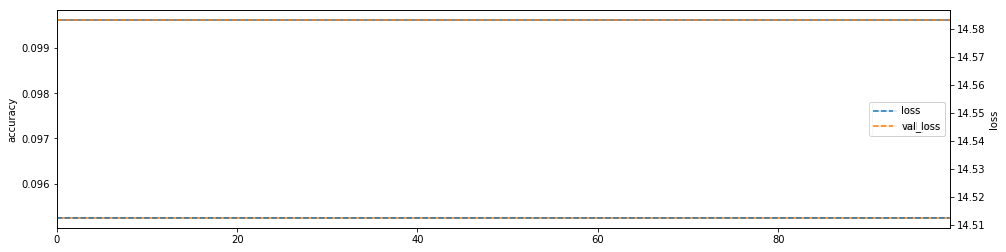

In [53]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")
plot_history(history_callback)

plt.show()

# with keras hidden layers without batchnormalization

In [123]:
X_train[:10,:10]
print (y_train) 



[2 6 7 ... 7 0 4]


Label:  4


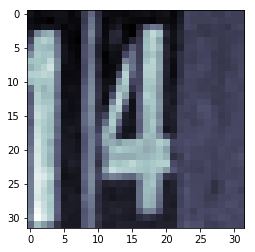

In [128]:
print('Label: ', y_train[200])
plt.imshow(X_train[200].reshape(32,32), cmap=plt.cm.bone);

In [154]:
Xtrain = X_train.reshape(-1,32,32,1)  
Xtest = X_test.reshape(-1,32,32,1)  
Xval= X_val.reshape(-1,32,32,1)


#ytrain = y_train.reshape(420,10,10)  
#ytest = y_test.reshape(180,10,10)  
#yval= y_val.reshape(600,10,10)

ytrain = y_train
ytest = y_test
yval= y_val




print (Xtrain.shape, Xtest.shape ,Xval.shape)

print (ytrain.shape, ytest.shape,yval.shape )

(42000, 32, 32, 1) (18000, 32, 32, 1) (60000, 32, 32, 1)
(42000,) (18000,) (60000,)


In [166]:
#y_train_list = [ytrain[:, i] for i in range(5)]
#y_train_list = [ytrain[ i] for i in range(5)]
y_train_list=ytrain

#y_test_list = [ytest[:, i] for i in range(5)]
#y_test_list = [ytest[i] for i in range(5)]

y_test_list = ytest

#y_valid_list = [yval[:, i] for i in range(5)]
#y_valid_list = [yval[i] for i in range(5)]

y_valid_list=yval

print (y_train_list)
print (y_test_list)
print (y_valid_list)


[2 6 7 ... 7 0 4]
[1 7 2 ... 7 9 2]
[0 0 0 ... 9 9 9]


In [171]:
def cnn_model():    
    model_input = Input(shape=(32, 32, 1))
    x = BatchNormalization()(model_input)
        
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(model_input)
    x = MaxPooling2D(pool_size=(2, 2))(x) 
    
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)    
    x = Dropout(0.25)(x)
    
    x = Conv2D(64, (3, 3), activation='relu')(x)       
    x = Conv2D(64, (3, 3), activation='relu')(x)    
    x = Dropout(0.25)(x)
    
    x = Conv2D(196, (3, 3), activation='relu')(x)    
    x = Dropout(0.25)(x)
              
    x = Flatten()(x)
    
    x = Dense(512, activation='relu')(x)    
    x = Dropout(0.5)(x)
    
    y1 = Dense(11, activation='softmax')(x)
    
    #model = Model(input=model_input, output=[y1, y2, y3, y4, y5])
    
    model = Model(input=model_input, output=[y1])
    print (model) 
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [172]:
cnn_model = cnn_model()

C:\Users\RB00001\Anaconda2\2.2\Anaconda2\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


In [173]:
cnn_history = cnn_model.fit(Xtrain, y_train_list, 
                            validation_data=(Xval, y_valid_list), 
                            epochs=75, batch_size=128, verbose=2, 
                            )

Train on 42000 samples, validate on 60000 samples
Epoch 1/75
 - 100s - loss: 1.7952 - acc: 0.3674 - val_loss: 0.7303 - val_acc: 0.7859
Epoch 2/75
 - 96s - loss: 0.8177 - acc: 0.7534 - val_loss: 0.4902 - val_acc: 0.8532
Epoch 3/75
 - 95s - loss: 0.6442 - acc: 0.8054 - val_loss: 0.4113 - val_acc: 0.8783
Epoch 4/75
 - 102s - loss: 0.5446 - acc: 0.8337 - val_loss: 0.3662 - val_acc: 0.8919
Epoch 5/75
 - 94s - loss: 0.4992 - acc: 0.8485 - val_loss: 0.3140 - val_acc: 0.9080
Epoch 6/75
 - 90s - loss: 0.4522 - acc: 0.8640 - val_loss: 0.3262 - val_acc: 0.9001
Epoch 7/75
 - 91s - loss: 0.4279 - acc: 0.8715 - val_loss: 0.2689 - val_acc: 0.9216
Epoch 8/75
 - 91s - loss: 0.4122 - acc: 0.8752 - val_loss: 0.2571 - val_acc: 0.9246
Epoch 9/75
 - 91s - loss: 0.3869 - acc: 0.8840 - val_loss: 0.2388 - val_acc: 0.9299
Epoch 10/75
 - 90s - loss: 0.3737 - acc: 0.8880 - val_loss: 0.2351 - val_acc: 0.9307
Epoch 11/75
 - 91s - loss: 0.3580 - acc: 0.8937 - val_loss: 0.2285 - val_acc: 0.9318
Epoch 12/75
 - 92s - l

In [174]:
 
#Beside low performance, another weakness of k-NN is slow runtime performance and large memory requirement.
#The k-NN classifier requires a large memory to store the entire training set.
#Hence, the bigger the training set, the bigger memory requirement and the larger  calculations must be performed.
#This causes the classification is extremely slow.  This is the reason why the classification time of k-NN here is very big,  
#CNN based approach is also easily adapted to classification problems. In fact, classification is often the more common use 
#of deep learning, such as in image classification like this example. with better accuracy, when we have more data to train
# i should have tried with google.colabs, but due to some technical issues, i had to continue with my local machine. i will anyawy 
#try this with google.collabs later and get differences as well. 


In [176]:
predictions = model.predict(testData)

In [213]:
print (predictions)
predictions.shape

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


(18000, 10)